In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv('apartments_pl_2024_01.csv')
df2 = pd.read_csv('apartments_pl_2024_02.csv')
df3 = pd.read_csv('apartments_pl_2024_03.csv')
df1['month'] = 0
df2['month'] = 1
df3['month'] = 2
df = pd.concat([df1, df2, df3])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49200 entries, 0 to 17317
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49200 non-null  object 
 1   city                  49200 non-null  object 
 2   type                  38390 non-null  object 
 3   squareMeters          49200 non-null  float64
 4   rooms                 49200 non-null  float64
 5   floor                 40387 non-null  float64
 6   floorCount            48618 non-null  float64
 7   buildYear             41337 non-null  float64
 8   latitude              49200 non-null  float64
 9   longitude             49200 non-null  float64
 10  centreDistance        49200 non-null  float64
 11  poiCount              49200 non-null  float64
 12  schoolDistance        49153 non-null  float64
 13  clinicDistance        49033 non-null  float64
 14  postOfficeDistance    49136 non-null  float64
 15  kindergartenDistanc

In [5]:
df.sample(3).T


,10012,3294,8738
id,dde4d790f6dee34490fcea2b86c67aba,2b29df85120d4ff8b3436202af9e852c,b7376e95d80c7f717d20bdc7e6b0a653
city,lodz,krakow,rzeszow
type,tenement,tenement,NaN
squareMeters,26.85,44.38,67.6
rooms,1.0,2.0,4.0
floor,NaN,3.0,NaN
floorCount,3.0,4.0,NaN
buildYear,1920.0,1937.0,NaN
latitude,51.76999,50.0756,50.02069
longitude,19.44041,19.9242,22.004925


In [6]:
df.isna().sum()

id                          0
city                        0
type                    10810
squareMeters                0
rooms                       0
floor                    8813
floorCount                582
buildYear                7863
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             47
clinicDistance            167
postOfficeDistance         64
kindergartenDistance       64
restaurantDistance        120
collegeDistance          1320
pharmacyDistance           66
ownership                   0
buildingMaterial        19406
condition               37121
hasParkingSpace             0
hasBalcony                  0
hasElevator              2454
hasSecurity                 0
hasStorageRoom              0
price                       0
month                       0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

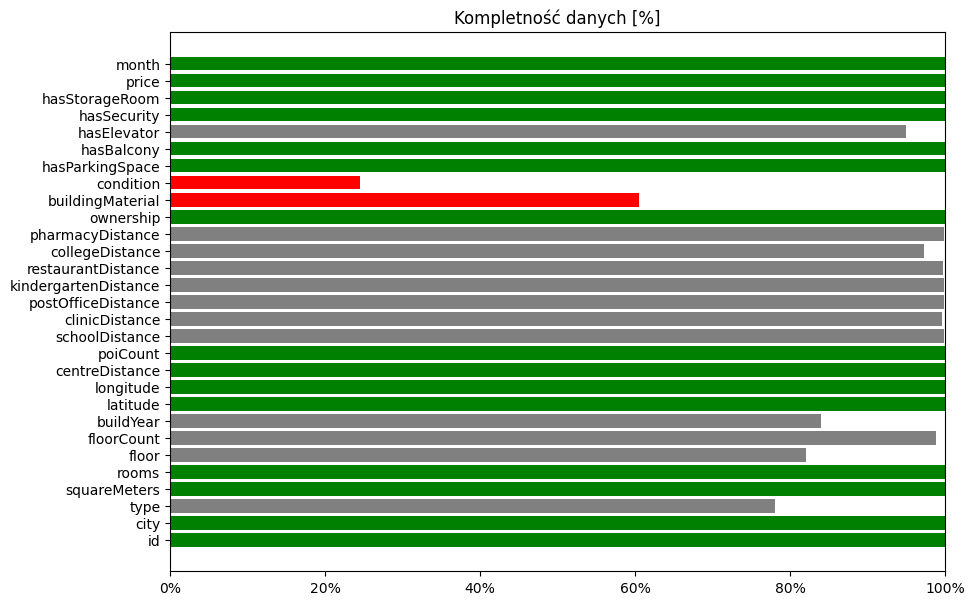

In [8]:
allCols = df.columns
nonEmpty = []
barColors = []
for colName in allCols:
  completeness = 1-len(df[df[colName].isnull()])/len(df)
  nonEmpty.append(completeness)
  if(completeness == 1):
     barColors.append('green')
  elif completeness < 0.75:
    barColors.append('red')
  else:
     barColors.append('grey')

def percent_formatter(x, pos):
    return str(round(x*100)) + "%"

fig, axs = plt.subplots(figsize=(10, 7))
axs.set_title("Kompletność danych [%]")
axs.barh(allCols, nonEmpty, color=barColors)
axs.set_xlim(0, 1)
axs.xaxis.set_major_formatter(percent_formatter)
plt.show()

In [9]:
df.drop(['condition', 'buildingMaterial'], axis=1, inplace=True)

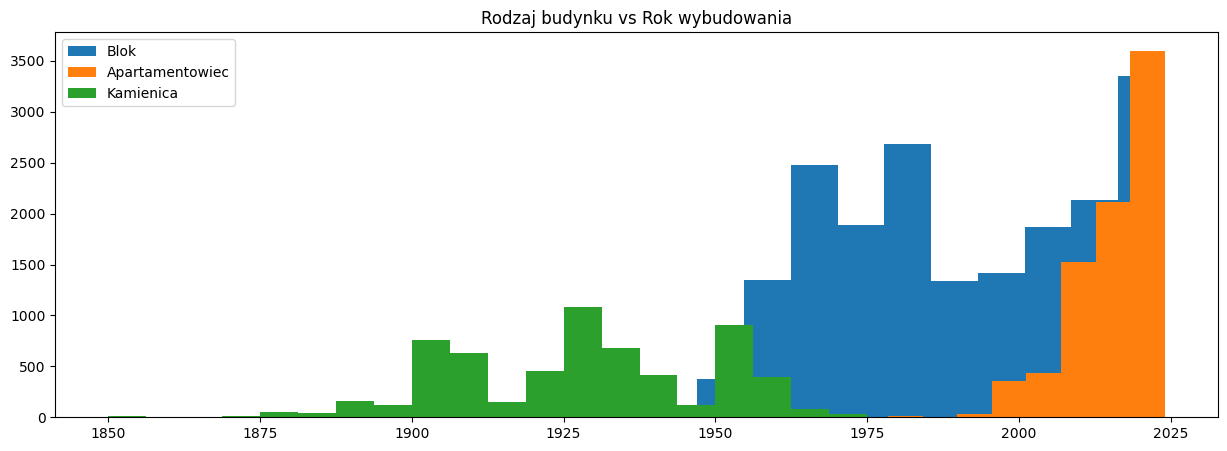

In [10]:
plt.figure(figsize=(15,5))
plt.title("Rodzaj budynku vs Rok wybudowania")
plt.hist(df[df['type'] == 'blockOfFlats']['buildYear'], bins=20, label="Blok")
plt.hist(df[df['type'] == 'apartmentBuilding']['buildYear'], bins=20, label="Apartamentowiec")
plt.hist(df[df['type'] == 'tenement']['buildYear'], bins=20, label="Kamienica")
plt.legend()
plt.show()

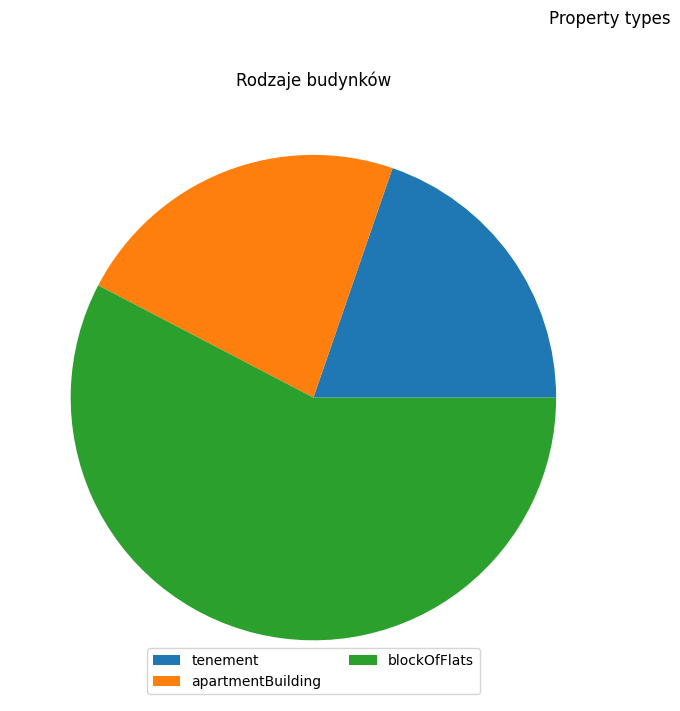

In [11]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Property types")

typeStats = pd.DataFrame(df.groupby(['type'], dropna=True)['price'].count()).reset_index().rename({'price': 'count'}, axis=1).sort_values(['count'], ascending=True)
typeStats['type'] = typeStats['type'].transform(lambda x: 'unknown' if pd.isnull(x) else x)
ax = fig.add_subplot(1,8,(1,4))
ax.set_title('Rodzaje budynków')
ax.pie(typeStats['count'])
ax.legend(labels=typeStats['type'], loc='lower center', ncol=2)


In [15]:
cleanData = df.copy()
cleanData = cleanData.drop(['ownership', 'longitude', 'latitude'], axis=1) 

In [16]:
cleanData = cleanData.dropna()
cleanData.isna().sum()

id                      0
city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
month                   0
dtype: int64

In [17]:
np.random.seed(3981)
guessData = df.copy()
# zgadywanie brakujących danych
# kamienice wybudowane między 1875 a 1975
guessData['buildYear'] = guessData.apply(lambda x: round(np.random.normal(loc=1925, scale=25)) if (pd.isna(x['buildYear']) and  x['type'] == 'tenement') else x['buildYear'], axis=1)
# bloki wybudowane między 1975 a 2000
guessData['buildYear'] = guessData.apply(lambda x: round(np.random.normal(loc=1991, scale=15)) if (pd.isna(x['buildYear']) and  x['type'] == 'blockOfFlats') else x['buildYear'], axis=1)
# apartamentowce wybudowane po 2000
guessData['buildYear'] = guessData.apply(lambda x: (2024 - round(abs(np.random.normal(loc=0, scale=15)))) if (pd.isna(x['buildYear']) and  x['type'] == 'apartmentBuilding') else x['buildYear'], axis=1)
# zgadywanie typu: kamienica, wybudowane przed 1960
guessData['type'] = guessData.apply(lambda x: 'tenement' if (pd.isna(x['type']) and  x['buildYear'] < 1960) else x['type'], axis=1)
# zgadywanie typu: blok, wybudowane między 1960 a 2000
guessData['type'] = guessData.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['buildYear'] < 2000) else x['type'], axis=1)
# zgadywanie typu: blok, należy do spółdzielni
guessData['type'] = guessData.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['ownership'] == 'cooperative') else x['type'], axis=1)
# zgadywanie typu: blok lub apartamentowiec, wybudowany po 2000
guessData['type'] = guessData.apply(lambda x: ('blockOfFlats' if(np.random.randint(0, 2) == 0) else 'apartmentBuilding') if (pd.isna(x['type'])) else x['type'], axis=1)
# najwięcej jest budynków z 4 piętrami
guessData['floorCount'] = guessData.apply(lambda x: max(x['floor'], 4) if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
guessData['floorCount'] = guessData.apply(lambda x: 4 if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
# równomierne rozmieszczenia apartamentów na wszystkich piętrach
guessData['floor'] = guessData.apply(lambda x: np.random.randint(1, x['floorCount']+1) if pd.isna(x['floor']) else x['floor'], axis=1)
# windy montowane w budynkach z piętrami większymi od 4 
guessData['hasElevator'] = guessData.apply(lambda x: 'no' if (pd.isna(x['hasElevator']) and x['floorCount'] <= 4) else x['hasElevator'], axis=1)
guessData['hasElevator'] = guessData.apply(lambda x: 'yes' if (pd.isna(x['hasElevator']) and x['floorCount'] > 4) else x['hasElevator'], axis=1)

In [18]:
guessData.isna().sum()

id                         0
city                       0
type                       0
squareMeters               0
rooms                      0
floor                      0
floorCount                 0
buildYear               2786
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance            47
clinicDistance           167
postOfficeDistance        64
kindergartenDistance      64
restaurantDistance       120
collegeDistance         1320
pharmacyDistance          66
ownership                  0
hasParkingSpace            0
hasBalcony                 0
hasElevator                0
hasSecurity                0
hasStorageRoom             0
price                      0
month                      0
dtype: int64

In [19]:
guessData = guessData.dropna()
guessData.isna().sum()

id                      0
city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
month                   0
dtype: int64

In [20]:
guessData = guessData.drop(['ownership', 'longitude', 'latitude'], axis=1)

In [21]:
display(pd.DataFrame([
  ["allData", len(df)],
  ["guessData", len(guessData)],
  ["cleanData", len(cleanData)]
], columns=['dataset', 'row count']))

,dataset,row count
0,allData,49200
1,guessData,45006
2,cleanData,25956


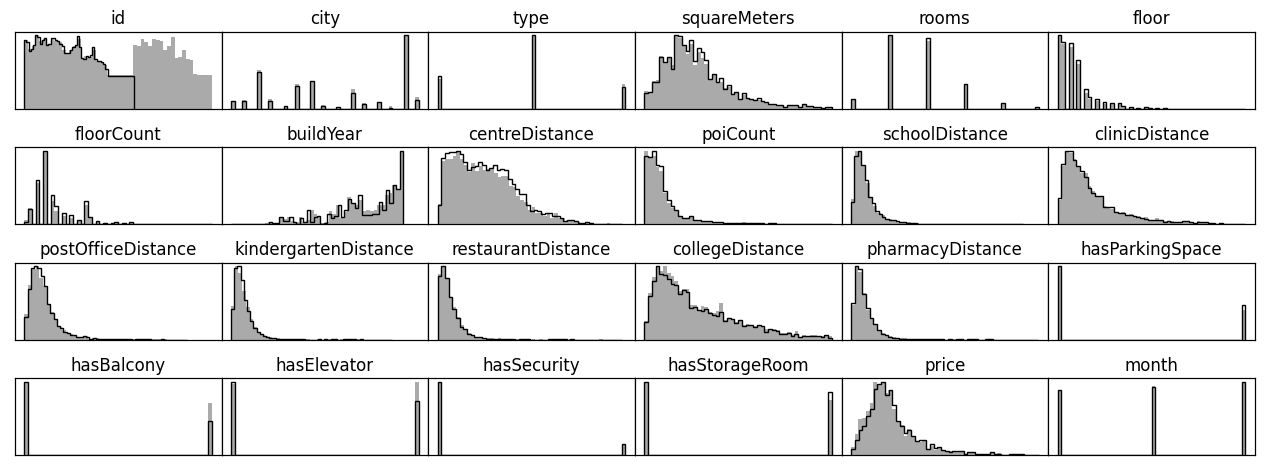

In [22]:
fig = plt.figure(figsize=(16, 7))

i=0
for col in guessData.columns:
  i += 1
  ax = fig.add_subplot(5,6,i)
  ax.set_title(col)
  ax2 = ax.twinx()
  if col in cleanData:
    ax2.hist(cleanData[col], histtype='step', bins=50, color='black')
  if col in guessData:
    ax.hist(guessData[col], bins=50, color="#aaa")
  ax.xaxis.set_visible(False)
  ax2.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  ax2.yaxis.set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

In [23]:
clean_df = guessData.drop_duplicates().reset_index(drop=True)

In [24]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45006 non-null  object 
 1   city                  45006 non-null  object 
 2   type                  45006 non-null  object 
 3   squareMeters          45006 non-null  float64
 4   rooms                 45006 non-null  float64
 5   floor                 45006 non-null  float64
 6   floorCount            45006 non-null  float64
 7   buildYear             45006 non-null  float64
 8   centreDistance        45006 non-null  float64
 9   poiCount              45006 non-null  float64
 10  schoolDistance        45006 non-null  float64
 11  clinicDistance        45006 non-null  float64
 12  postOfficeDistance    45006 non-null  float64
 13  kindergartenDistance  45006 non-null  float64
 14  restaurantDistance    45006 non-null  float64
 15  collegeDistance    

In [25]:
clean_df.drop(['id'], axis=1, inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  45006 non-null  object 
 1   type                  45006 non-null  object 
 2   squareMeters          45006 non-null  float64
 3   rooms                 45006 non-null  float64
 4   floor                 45006 non-null  float64
 5   floorCount            45006 non-null  float64
 6   buildYear             45006 non-null  float64
 7   centreDistance        45006 non-null  float64
 8   poiCount              45006 non-null  float64
 9   schoolDistance        45006 non-null  float64
 10  clinicDistance        45006 non-null  float64
 11  postOfficeDistance    45006 non-null  float64
 12  kindergartenDistance  45006 non-null  float64
 13  restaurantDistance    45006 non-null  float64
 14  collegeDistance       45006 non-null  float64
 15  pharmacyDistance   

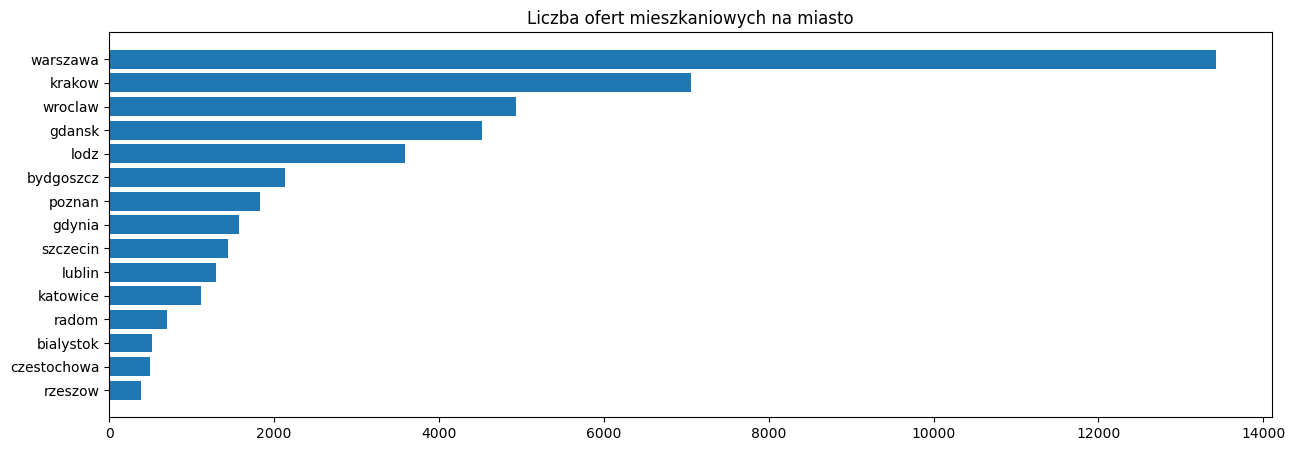

In [26]:
cityNames = clean_df.city.unique()
cityData = {'all cities': clean_df}
for cityName in cityNames:
    cityData[cityName] = clean_df[clean_df.city == cityName]

cityStats = pd.DataFrame(clean_df.groupby(['city'])['price'].count()).reset_index().rename({'price': 'count'}, axis=1).sort_values(['count'], ascending=True)
plt.figure(figsize=(15, 5))
plt.title("Liczba ofert mieszkaniowych na miasto")
plt.barh(cityStats['city'], cityStats['count'])
plt.show()


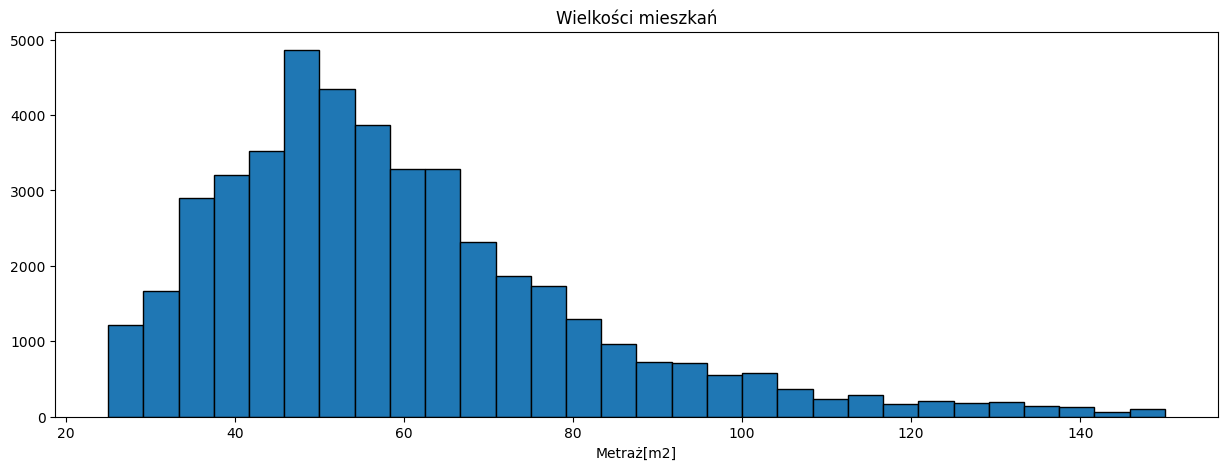

In [27]:
plt.figure(figsize=(15, 5))
plt.title("Wielkości mieszkań")
plt.xlabel('Metraż[m2]')
plt.hist(clean_df['squareMeters'], bins=30, edgecolor='black')
plt.show()

In [28]:
lenBefore = len(clean_df)
cut_df = clean_df[clean_df['squareMeters'] <= 110]


In [29]:
cityNames = cut_df.city.unique()
cityData = {'all cities': cut_df}
for cityName in cityNames:
    cityData[cityName] = cut_df[cut_df.city == cityName]

cityStats = pd.DataFrame(cut_df.groupby(['city'])['price'].count()).reset_index().rename({'price': 'count'}, axis=1).sort_values(['count'], ascending=True)

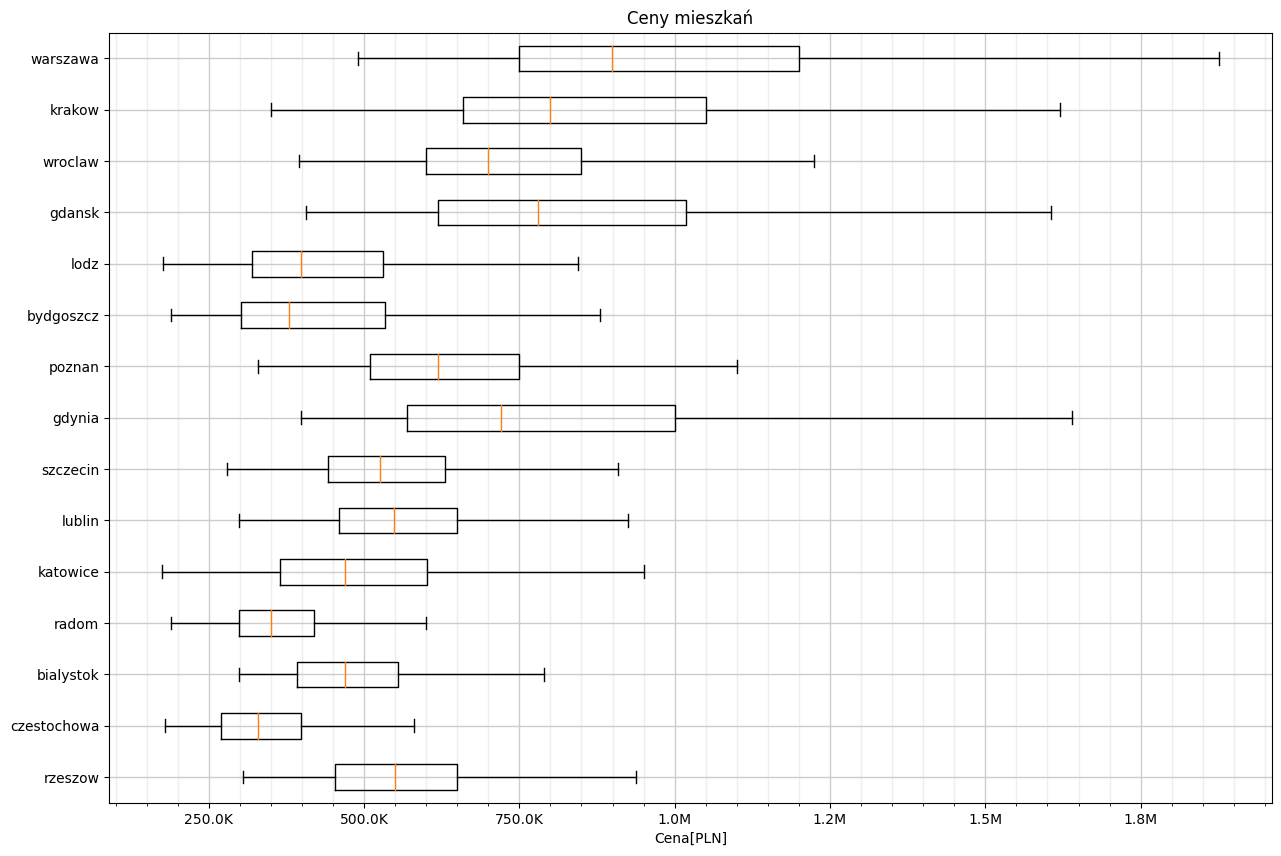

In [30]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def short_formatter(x, pos):
    if x < 1e3: return x
    if x < 1e6: return str(round(x / 1e3, 1)) + "K"
    return str(round(x / 1e6, 1)) + "M"
cityNames = cityStats['city'].to_list()
priceRanges = []
priceLabels = []
for city in cityNames:
    priceRanges.append(cityData[city]['price'])
    priceLabels.append(city)
    
plt.figure(figsize=(15, 10))
plt.title("Ceny mieszkań")
plt.boxplot(priceRanges, labels=priceLabels, vert=False, showfliers=False)
plt.gca().xaxis.set_major_formatter(short_formatter)
plt.xlabel('Cena[PLN]')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(linewidth=1, color="#eee", which='minor')
plt.grid(linewidth=1, color="#ccc", which='major')
plt.show()

In [31]:
Q1 = np.percentile(cut_df['price'], 25)
Q3 = np.percentile(cut_df['price'], 75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
cut_df = cut_df[(cut_df['price'] <= upper_bound)]

In [32]:
lenAfter = len(cut_df)
print("Redukcja danych", lenBefore, '->', lenAfter, '|', str(round(100*(1-lenAfter/lenBefore))) + "%")

Redukcja danych 45006 -> 41353 | 8%


<ipython-input-35-dba000c90185>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cut_df.corr()


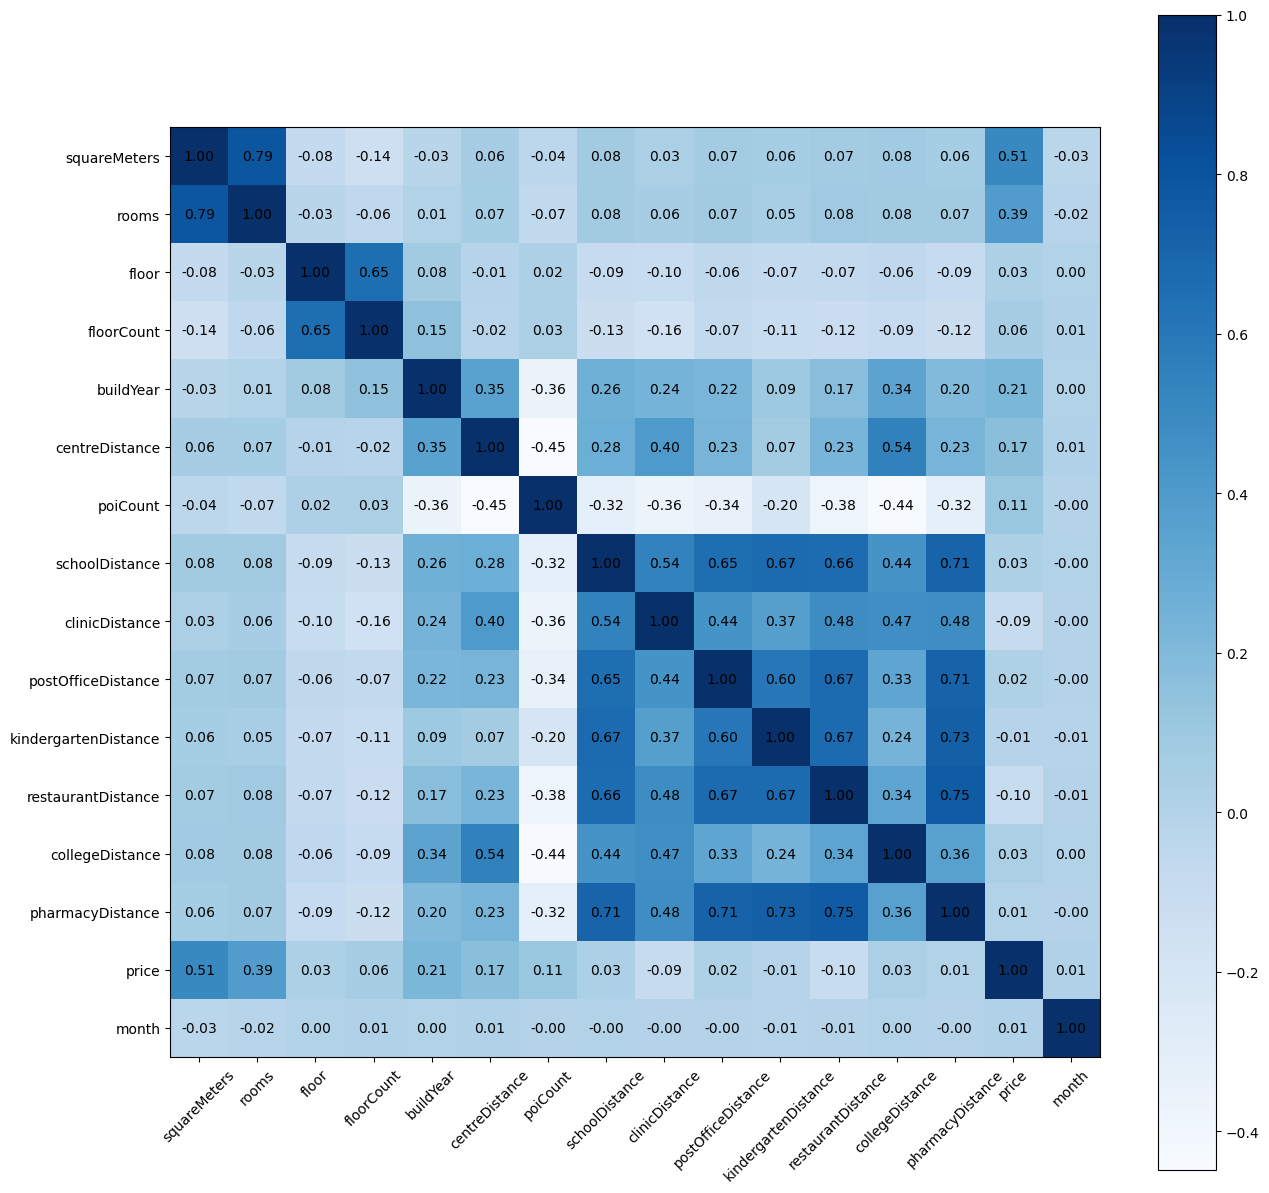

In [35]:
corr_matrix = cut_df.corr()
plt.figure(figsize=(15, 15))
plt.imshow(corr_matrix, cmap='Blues')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
plt.colorbar()
plt.show()

In [36]:
pois = ['School', 'Clinic', 'PostOffice', 'Kindergarten', 'Restaurant', 'College', 'Pharmacy']
poiDistanceThreshold = 0.5
for poi in pois:
  cut_df['has' + poi] = cut_df[poi[0].lower() + poi[1:] + "Distance"].transform(lambda x: True if x <= poiDistanceThreshold else False)
  cut_df = cut_df.drop([poi[0].lower() + poi[1:] + "Distance"], axis=1)

cut_df['price'] = cut_df.pop('price')

print("Near POI stats")
print("(threshold: " + str(poiDistanceThreshold*1000) + 'm)')
print("======================================")
for poi in pois:
  print(str(round(100*len(cut_df[cut_df['has' + poi] == True]) / len(cut_df))).rjust(2) + "% apartments are near a " + poi)

<ipython-input-36-74f8178eb6fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_df['has' + poi] = cut_df[poi[0].lower() + poi[1:] + "Distance"].transform(lambda x: True if x <= poiDistanceThreshold else False)


Near POI stats
(threshold: 500.0m)
78% apartments are near a School
37% apartments are near a Clinic
64% apartments are near a PostOffice
84% apartments are near a Kindergarten
83% apartments are near a Restaurant
20% apartments are near a College
84% apartments are near a Pharmacy


In [38]:
cut_df.sample(3).T

,43142,2451,13673
city,warszawa,krakow,bydgoszcz
type,blockOfFlats,apartmentBuilding,blockOfFlats
squareMeters,57.78,34.59,53.0
rooms,2.0,2.0,3.0
floor,3.0,4.0,3.0
floorCount,3.0,5.0,4.0
buildYear,1950.0,2022.0,1977.0
centreDistance,4.29,1.77,4.04
poiCount,28.0,28.0,14.0
hasParkingSpace,no,no,no


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder

In [51]:
x_set = cut_df.loc[:, cut_df.columns != 'price']
y_set = cut_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2, random_state=31413)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=32056)

In [52]:
ct = make_column_transformer(
  (MinMaxScaler(), ['month', 'squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'centreDistance', 'poiCount']),
  (OneHotEncoder(), ['city', 'type']),
  (OrdinalEncoder(), ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom', 'hasSchool', 'hasClinic', 'hasPostOffice', 'hasKindergarten', 'hasRestaurant', 'hasCollege', 'hasPharmacy'])
)
ct.fit(X_train)


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['month', 'squareMeters', 'rooms', 'floor',
                                  'floorCount', 'buildYear', 'centreDistance',
                                  'poiCount']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['city', 'type']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['hasParkingSpace', 'hasBalcony',
                                  'hasElevator', 'hasSecurity',
                                  'hasStorageRoom', 'hasSchool', 'hasClinic',
                                  'hasPostOffice', 'hasKindergarten',
                                  'hasRestaurant', 'hasCollege',
                                  'hasPharmacy'])])

In [53]:
def transform_input(X_input):
  return ct.transform(X_input)

X_train_orig = X_train.copy()
X_valid_orig = X_valid.copy()
X_test_orig = X_test.copy()

X_train = transform_input(X_train)
X_valid = transform_input(X_valid)
X_test = transform_input(X_test)

print("Train data size:      ", X_train.shape)
print("Validation data size: ", X_valid.shape)
print("Test data size:       ", X_test.shape)
display("Test data sample", pd.DataFrame(X_train).sample(5))

Train data size:       (33082, 38)
Validation data size:  (4135, 38)
Test data size:        (4136, 38)


'Test data sample'

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
18946,1.0,0.277647,0.25,0.086957,0.071429,0.836842,0.480072,0.028436,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
28865,1.0,0.694118,0.75,0.000000,0.000000,0.426316,0.104469,0.066351,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
21107,0.0,0.396471,0.75,0.000000,0.142857,0.631579,0.402778,0.099526,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
13508,1.0,0.311765,0.25,0.086957,0.142857,0.831579,0.012077,0.568720,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
21808,0.0,0.214118,0.25,0.000000,0.178571,0.805263,0.036836,0.535545,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


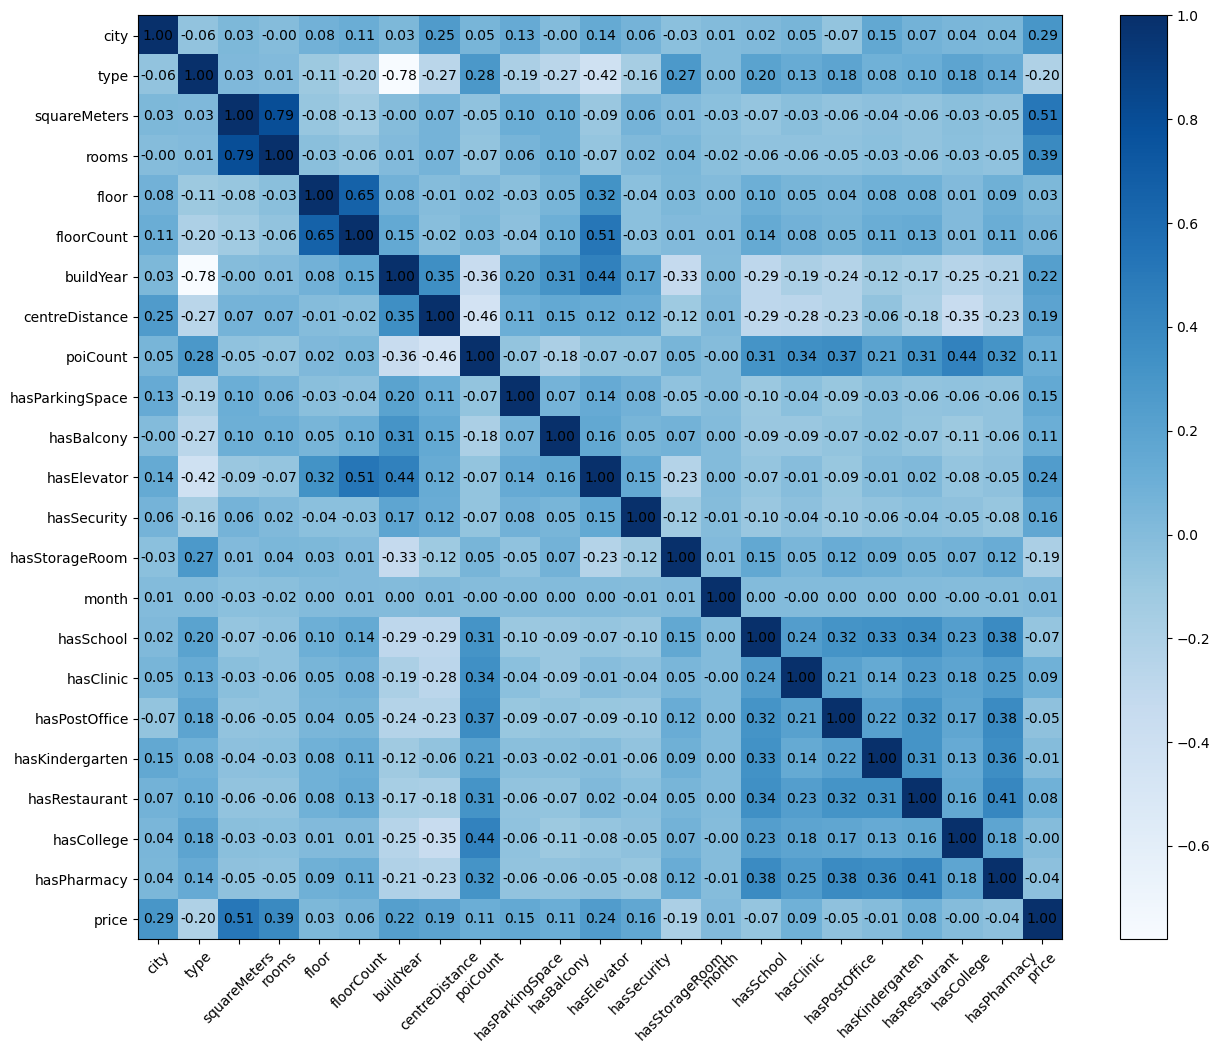

In [57]:
from sklearn.preprocessing import LabelEncoder
df_clean = cut_df.copy()
df_clean[df_clean.columns] = df_clean[df_clean.columns].apply(LabelEncoder().fit_transform)
corr_matrix = df_clean.corr()
plt.figure(figsize=(15, 12))
plt.imshow(corr_matrix, cmap='Blues')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
plt.colorbar()
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
x_clf = df_clean.loc[:, df_clean.columns != 'price']
y_clf = df_clean['price'].values
clf = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=9, n_jobs=-1)
clf.fit(x_clf, y_clf)

RandomForestClassifier(max_depth=9, n_estimators=10, n_jobs=-1, random_state=0)

<BarContainer object of 22 artists>

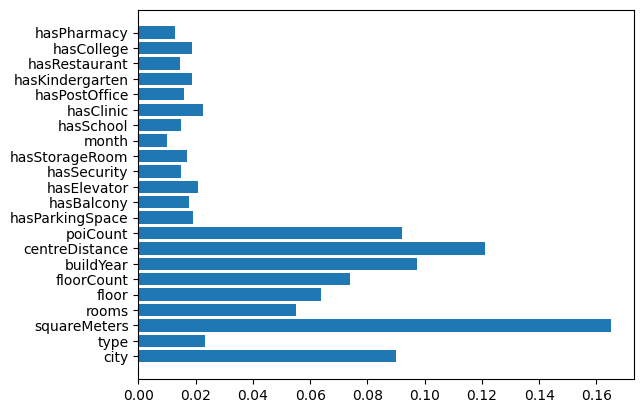

In [61]:
feature_scores = pd.Series(clf.feature_importances_, index=x_clf.columns).sort_values(ascending=False)
plt.barh(x_clf.columns, clf.feature_importances_)

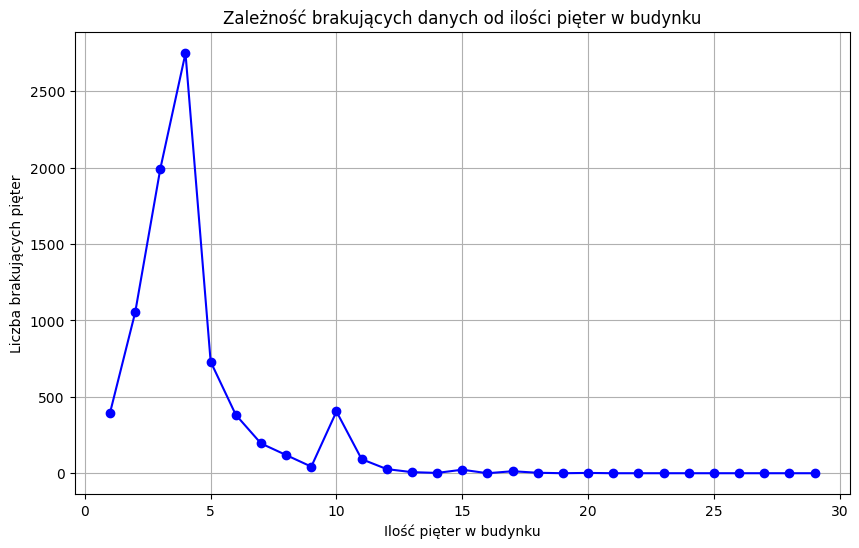

In [64]:
missing_floor_data = df.groupby('floorCount')['floor'].apply(lambda x: x.isnull().sum()).reset_index()
plt.figure(figsize=(10,6))
plt.plot(missing_floor_data['floorCount'], missing_floor_data['floor'], marker='o', color='b', linestyle='-')
plt.title('Zależność brakujących danych od ilości pięter w budynku')
plt.xlabel('Ilość pięter w budynku')
plt.ylabel('Liczba brakujących pięter')
plt.grid(True)
plt.show()

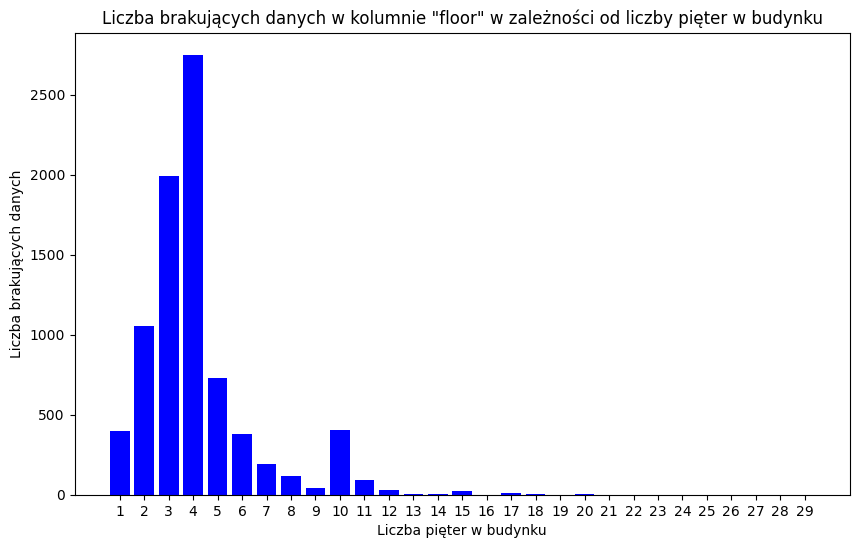

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(missing_floor_data['floorCount'], missing_floor_data['floor'], color='b')
plt.title('Liczba brakujących danych w kolumnie "floor" w zależności od liczby pięter w budynku')
plt.xlabel('Liczba pięter w budynku')
plt.ylabel('Liczba brakujących danych')
plt.xticks(missing_floor_data['floorCount'])

plt.show()

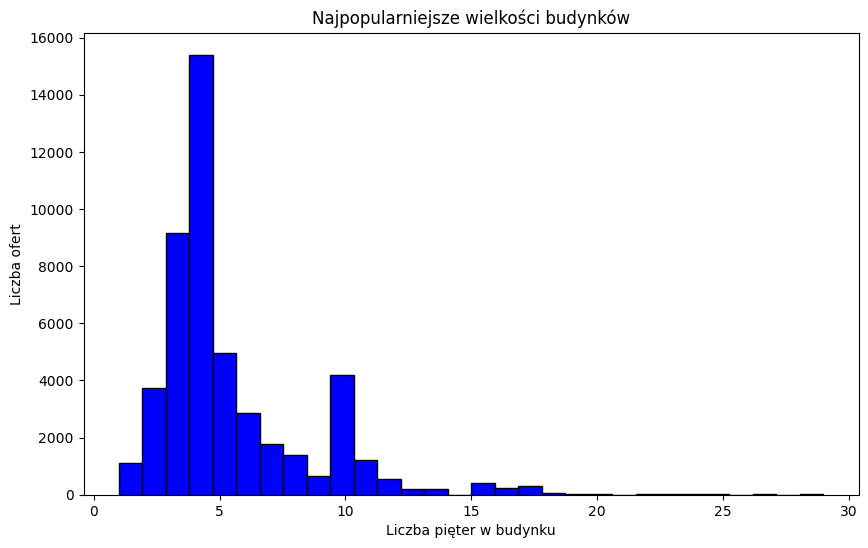

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(df['floorCount'], bins=30, color='b', edgecolor='black')
plt.title('Najpopularniejsze wielkości budynków')
plt.xlabel('Liczba pięter w budynku')
plt.ylabel('Liczba ofert')
plt.show()


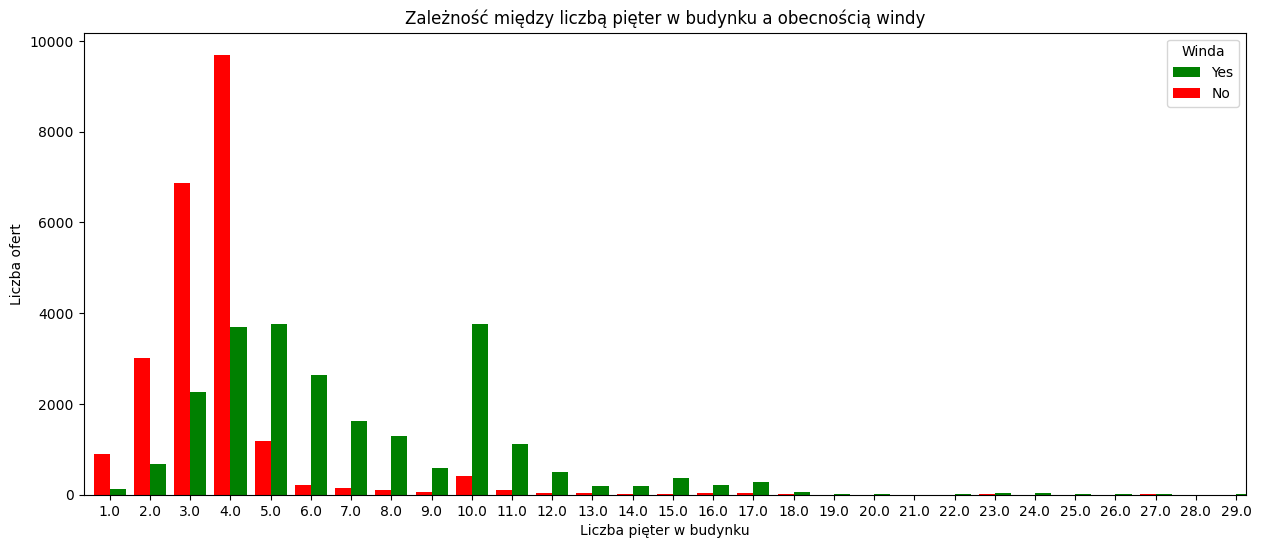

In [79]:
elevator_counts = df.groupby(['floorCount', 'hasElevator']).size().unstack(fill_value=0)

# Wykres słupkowy
plt.figure(figsize=(15, 6))
elevator_counts['yes'].plot(kind='bar', color='green', position=0, width=0.4, label='Yes', align='center')
elevator_counts['no'].plot(kind='bar', color='red', position=1, width=0.4, label='No', align='center')
plt.title('Zależność między liczbą pięter w budynku a obecnością windy')
plt.xlabel('Liczba pięter w budynku')
plt.ylabel('Liczba ofert')
plt.xticks(rotation=0)
plt.legend(title='Winda')
plt.show()

In [80]:
guessData.isna().sum()


id                      0
city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
month                   0
dtype: int64

In [ ]:
def get_user_input():
    user_input = {}
    # Atrybuty, dla których użytkownik wprowadza wartości liczbowe
    numeric_attributes = ['month', 'squareMeters', 'rooms', 'floor', 'floorCount',
                          'buildYear', 'centreDistance', 'poiCount']
    # Atrybuty, które mogą przyjmować wartości 'tak' lub 'nie'
    binary_attributes = ['hasParkingSpace', 'hasBalcony', 'hasElevator',
                         'hasSecurity', 'hasStorageRoom']
    # Atrybuty, które mogą przyjmować wartości True lub False
    boolean_attributes = ['hasSchool', 'hasClinic', 'hasPostOffice',
                          'hasKindergarten', 'hasRestaurant',
                          'hasCollege', 'hasPharmacy']
    # Atrybut 'city' - nazwa miasta
    city = input("Podaj nazwę miasta: ").lower()
    user_input['city'] = city
    # Atrybut 'type' - rodzaj budynku
    building_type = input("Podaj rodzaj budynku('blok','apartamentowiec', 'kamienica'): ").lower()
    if building_type == 'blok':
        user_input['type'] = 'blockOfFlats'
    elif building_type == 'apartamentowiec':
        user_input['type'] = 'apartmentBuilding'
    elif building_type == 'kamienica':
        user_input['type'] = 'tenement'
    else:
        print("Nieprawidłowy rodzaj budynku. Wprowadź 'blok', 'apartamentowiec' lub 'kamienica'.")
        return None
    # Wprowadzanie danych przez użytkownika
    for attr in numeric_attributes:
        value = input(f"Podaj wartość dla atrybutu '{attr}': ")
        # Sprawdzenie czy wartość jest możliwa do przekonwertowania na liczbę
        try:
            user_input[attr] = float(value)
        except ValueError:
            print(f"Nieprawidłowa wartość dla atrybutu '{attr}'. Wprowadź liczbę.")
            return None
    # Wprowadzanie danych dla atrybutów 'tak' lub 'nie'
    for attr in binary_attributes:
        value = input(f"Czy '{attr}' jest obecne (wprowadź 'tak' lub 'nie'): ").lower()
        # Zamiana odpowiedzi użytkownika na 'yes' lub 'no'
        if value == 'tak':
            user_input[attr] = 'yes'
        elif value == 'nie':
            user_input[attr] = 'no'
        else:
            print(f"Nieprawidłowa odpowiedź. Wprowadź 'tak' lub 'nie' dla atrybutu '{attr}'.")
            return None
    # Wprowadzanie danych dla atrybutów True lub False
    for attr in boolean_attributes:
        value = input(f"Czy '{attr}' jest obecne (wprowadź 'tak' lub 'nie'): ").lower()
        # Zamiana odpowiedzi użytkownika na True lub False
        if value == 'tak':
            user_input[attr] = True
        elif value == 'nie':
            user_input[attr] = False
        else:
            print(f"Nieprawidłowa odpowiedź. Wprowadź 'tak' lub 'nie' dla atrybutu '{attr}'.")
            return None
    return user_input
# Wywołanie funkcji i pobranie danych od użytkownika
user_data = get_user_input()
# Jeśli dane nie zostały poprawnie wprowadzone, powtórz próbę
while user_data is None:
    user_data = get_user_input()